# Visualización de datos con Matplotlib y Seaborn

**Relator: Felipe Mesa Abraham** 

Correo: femesa@udec.cl


En esta actividad se trabajará con las librerias  y  [Matplotlib](https://matplotlib.org/) y  [Seaborn](https://seaborn.pydata.org/) para crear diferentes visualizaciones en torno al objetivo de cada una. La actividad consiste en ejemplos sobre el funcionamiento del codigo para los diferentes tipos de visualizaciones vistos en la sección teórica y ejercicios guiados.

# Ejemplos

## Descarga de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
!gdown --id 18Q_sXvrhlC6LNXSzQDsTUBZRm_K8X5Vi

Downloading...
From: https://drive.google.com/uc?id=18Q_sXvrhlC6LNXSzQDsTUBZRm_K8X5Vi
To: /content/DataCenso.csv
100% 5.53M/5.53M [00:00<00:00, 25.8MB/s]


In [ ]:
censo = pd.read_csv("DataCenso.csv")
censo.head()

,comuna,parentesco,edad,pais,a_llegada,n_educacional,descendencia
0,Putre,Esposo/a o cónyuge,54,Italia,2007,9,0
1,Putre,Persona en vivienda colectiva,26,Alemania,2017,9,0
2,Putre,Esposo/a o cónyuge,34,México,1999,3,4
3,Putre,Jefe/a de hogar,32,México,2011,6,1
4,Putre,Persona en vivienda colectiva,34,Suiza,2017,9,0


## Gráfico de barra

In [ ]:
data_barra = censo.groupby('parentesco').mean()
data_barra.head()

,edad,a_llegada,n_educacional,descendencia
parentesco,,,,
Abuelo/a,79.467742,1995.161290,5.435484,2.854839
Conviviente de hecho o pareja,31.507202,2011.837722,7.877560,0.849651
Conviviente por unión civil,33.682310,2010.599278,7.669675,1.104693
Cuñado/a,31.145013,2014.837927,7.175853,0.864829
Esposo/a o cónyuge,38.464269,2007.379972,8.077481,1.551032


Usando Matplotlib

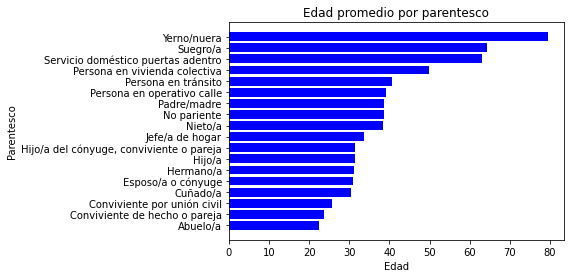

In [ ]:
# creando las variables
parentesco = list(data_barra.index)
values = list(data_barra['edad'].sort_values())
 
# creando el grafico (el grafico fue hecho horizontal para visualizar los atributos)
plt.barh(parentesco, values, color ='blue')
 
plt.xlabel("Edad")
plt.ylabel("Parentesco")
plt.title("Edad promedio por parentesco")
plt.show()

Usando Seaborn

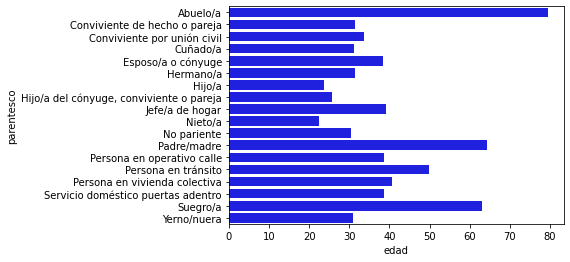

In [ ]:
sns.barplot(x='edad', y=data_barra.index, data=data_barra, orient='h', color="blue")

## Gráfico de línea

In [ ]:
data_linea = censo.groupby('a_llegada').size()
data_linea

a_llegada
1950     1365
1951      153
1952      200
1953      142
1954      111
        ...  
2013     3590
2014     5114
2015     9621
2016    24911
2017    14683
Length: 68, dtype: int64

Usando Matplotlib

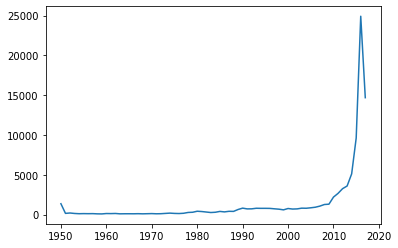

In [ ]:
plt.plot(data_linea.index, data_linea)
plt.show()

Usando Seaborn

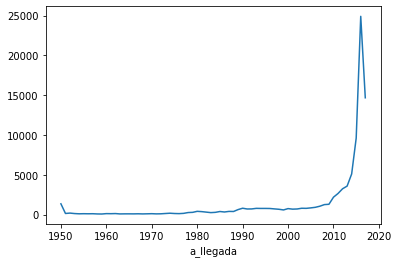

In [ ]:
sns.lineplot(data=data_linea, x=data_linea.index, y=data_linea)

## Gráfico de dispersión

In [ ]:
data_dispersion = censo[censo['comuna'] == 'Concepción'] 
data_dispersion.head()

,comuna,parentesco,edad,pais,a_llegada,n_educacional,descendencia
76300,Concepción,No pariente,35,Venezuela (República Bolivariana de),2016,9,0
76301,Concepción,Jefe/a de hogar,89,Alemania,1950,9,2
76302,Concepción,Persona en vivienda colectiva,35,Rusia (Federación de),2017,12,0
76303,Concepción,Persona en vivienda colectiva,73,México,2017,3,6
76304,Concepción,Esposo/a o cónyuge,25,Venezuela (República Bolivariana de),2016,9,1


Usando Matplotlib

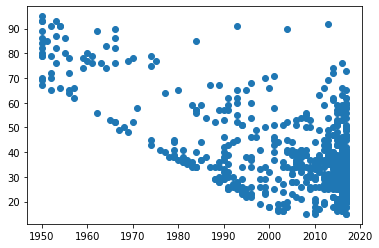

In [ ]:
plt.scatter(x=data_dispersion['a_llegada'], y=data_dispersion['edad'])
plt.show()

Usando Seaborn

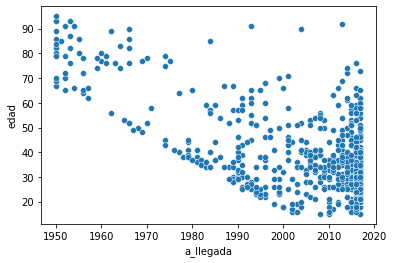

In [ ]:
sns.scatterplot(data=data_dispersion, x="a_llegada", y="edad")

## Gráfico de burbuja

Usando Matplotlib

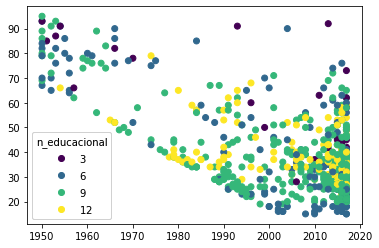

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=data_dispersion['a_llegada'],
                     y= data_dispersion['edad'],
                     c=data_dispersion['n_educacional'])

# Creamos la leyenda para codificar un tercer atributo, en este caso el nivel educacional
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="n_educacional")
ax.add_artist(legend)


plt.show()

Usando Seaborn

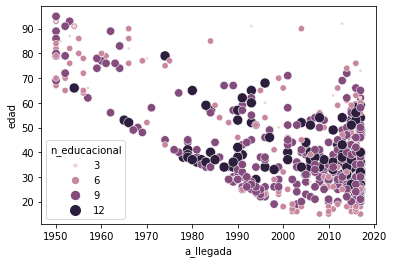

In [ ]:
sns.scatterplot(
    data=data_dispersion,
    x='a_llegada',
    y= 'edad', 
    hue="n_educacional", 
    size="n_educacional",
    sizes=(10, 100), legend="full"
)

## Gráfico de torta

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_titanic_clase = df_titanic.groupby('class').size()
df_titanic_clase.head()

class
First     216
Second    184
Third     491
dtype: int64

Usando Matplotlib

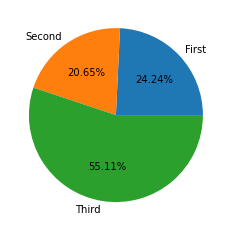

In [ ]:
pie_plot = plt.pie(df_titanic_clase, labels=list(df_titanic_clase.index), autopct='%.2f%%')
plt.show()

Usando Seaborn ... lamentablemente no se puede.

https://seaborn.pydata.org/examples/index.html

## Histograma

In [ ]:
from vega_datasets import data

link = data.movies.url
movies = pd.read_json(link)
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


Usando Matplotlib

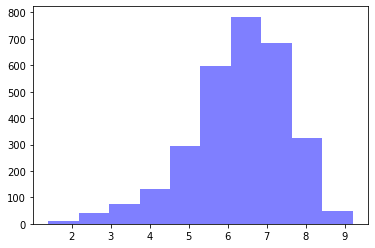

In [ ]:
num_bins = 10
n, bins, patches = plt.hist(movies['IMDB_Rating'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

Usando Seaborn

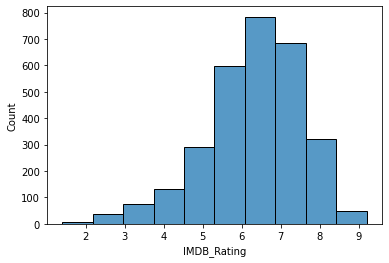

In [ ]:
sns.histplot(data=movies, x="IMDB_Rating", bins=10)

## Gráfico de caja

Usando Seaborn

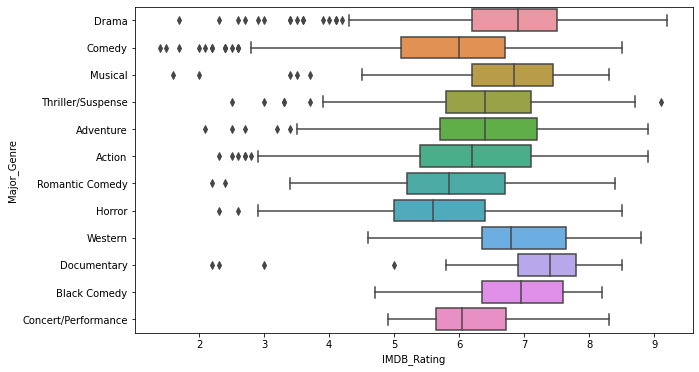

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="IMDB_Rating", y="Major_Genre", data=movies, orient='h')

## Gráfico de calor

In [ ]:
!gdown --id 1rCPEyy5Kj-alvcA8Ge_C_0OGwug2Oi7c

Downloading...
From: https://drive.google.com/uc?id=1rCPEyy5Kj-alvcA8Ge_C_0OGwug2Oi7c
To: /content/videollamada.csv
100% 2.19k/2.19k [00:00<00:00, 5.71MB/s]


In [ ]:
videollamadas = pd.read_csv('/content/videollamada.csv')
videollamadas.head()

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249


In [ ]:
videollamadas_pivot = videollamadas.pivot(index="Día", columns="Semana", values="Horas")
videollamadas_pivot

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037


Usando Matplotlib ... no funciona directamente, hay que definir algunas funciones primero.

https://matplotlib.org/devdocs/gallery/images_contours_and_fields/image_annotated_heatmap.html

Usando Seaborn

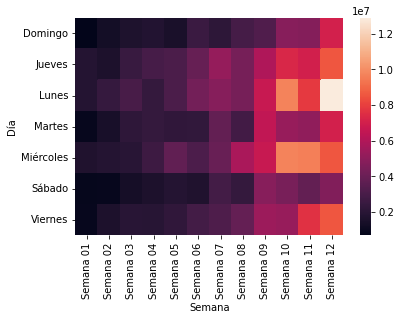

In [ ]:
sns.heatmap(videollamadas_pivot)



---



---



# Ejercicios

Durante el 2013 al 2017 hubo una gran pandemia a nivel mundial.
A continuacion, se entregan 4 datasets con información respecto al estado de la pandemia.
Se le pide que visualize las siguientes situaciones:


*   Comparacion de total de contagios por pais.
*   Tendencia de los contagios en el tiempo.
*   Comparacion de distribucion entre meses.
*   Distribución de fallecidos por mes y año.

Las instrucciones más detalladas de cada dataset se entrega a continuacion.









## Comparacion de total de contagios por pais

Use la visualizacion adecuada para comparar la cantidad total de fallecidos por pais. El dataset se entrega en la siguiente celda.

In [ ]:
!gdown --id 1zzFjPv4hEXGNUCxV6g_vpsV5WY1Xm2ik

Downloading...
From: https://drive.google.com/uc?id=1zzFjPv4hEXGNUCxV6g_vpsV5WY1Xm2ik
To: /content/V01.csv
100% 346/346 [00:00<00:00, 532kB/s]


In [ ]:
df_1 = pd.read_csv('/content/V01.csv')
df_1.head()

,Paises,Contagiados
0,España,569457
1,Chile,1088398
2,Guinea,1302202
3,Ecuador,1930001
4,Rusia,2000091


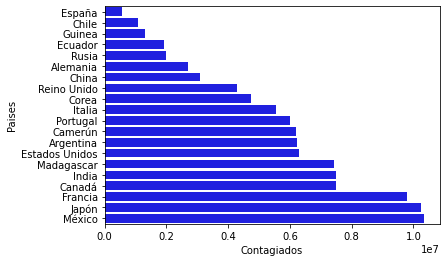

In [ ]:
sns.barplot(data=df_1, x='Contagiados', y='Paises', orient='h', color='blue')

## Tendencia de contagios en el tiempo.

Use la visualizacion adecuada para mostrar como ha cambiado el total de contagiados a lo largo del tiempo. El dataset se entrega en la siguiente celda.

In [ ]:
!gdown --id 1ovetGRw83GIj1s8ancqGNnJWN801rElT

Downloading...
From: https://drive.google.com/uc?id=1ovetGRw83GIj1s8ancqGNnJWN801rElT
To: /content/V02.csv
100% 98.0/98.0 [00:00<00:00, 44.4kB/s]


In [ ]:
df_2 = pd.read_csv('/content/V02.csv')
df_2.head()

,Año,Total Contagiados
0,2013,104778830
1,2014,168031244
2,2015,248136117
3,2016,372664870
4,2017,550371599


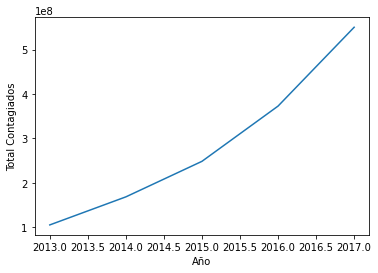

In [ ]:
sns.lineplot(data=df_2, x='Año', y='Total Contagiados')

## Comparación de distribución entre meses

La visualización anterior coloca la evolución de contagios según las fechas de ocurrencia, pero la realidad es que cada país tuvo su primer infectado en distintos momentos. Se busca saber cómo distribuyen los crecimientos de contagios bajo una misma escala de tiempo.
Use la visualizacion adecuada para presentar cada una de las distribuciones para cada mes. El dataset se entrega en la siguiente celda.

In [ ]:
!gdown --id 1GYAmTubXinEsJeVVUgLI5xiwSEMshIw0

Downloading...
From: https://drive.google.com/uc?id=1GYAmTubXinEsJeVVUgLI5xiwSEMshIw0
To: /content/V03.csv
100% 3.75k/3.75k [00:00<00:00, 6.54MB/s]


In [ ]:
df_3 = pd.read_csv('/content/V03.csv')
df_3.head()

,Pais,Mes,Contagiados
0,Estados Unidos,1,5230
1,Estados Unidos,2,4785
2,Estados Unidos,3,4217
3,Estados Unidos,4,704
4,Estados Unidos,5,8694


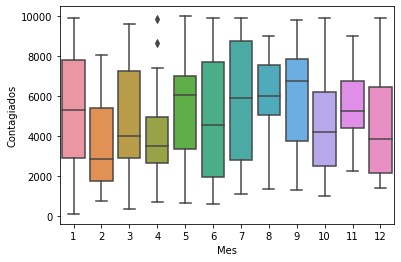

In [ ]:
sns.boxplot(data=df_3, x='Mes', y='Contagiados')

## Distribución de fallecidos por mes y año

Utilice una visualizacion adecuada para mostrar como se distribuye el total de fallecidos para cada combinación de mes y año. El dataset se entrega en la siguiente celda.

In [ ]:
!gdown --id 1_0ps5etkFpn47eVUq4cTbu8KkrHawptq

Downloading...
From: https://drive.google.com/uc?id=1_0ps5etkFpn47eVUq4cTbu8KkrHawptq
To: /content/V04.csv
100% 1.36k/1.36k [00:00<00:00, 1.17MB/s]


In [ ]:
df_4 = pd.read_csv('/content/V04.csv')
df_4.head()

,Año,Mes,Fallecidos
0,2013,07-Julio,243560
1,2013,08-Agosto,297685
2,2013,09-Septiembre,255738
3,2013,10-Octubre,202459
4,2013,11-Noviembre,260474


In [ ]:
df_4_pivot = df_4.pivot(index='Mes', columns='Año', values='Fallecidos')
df_4_pivot

Año,2013,2014,2015,2016,2017
Mes,,,,,
01-Enero,159836,217682,255738,274766,388851
02-Febrero,204658,207787,282801,320561,368385
03-Marzo,152225,229775,297685,354304,410247
04-Abril,169139,242419,282801,337433,429783
05-Mayo,234427,277819,378872,445411,470156
06-Junio,261066,290902,437597,472406,601696
07-Julio,243560,317508,432996,593882,720398
08-Agosto,297685,332460,452481,512898,565602
09-Septiembre,255738,406340,350727,537321,654907


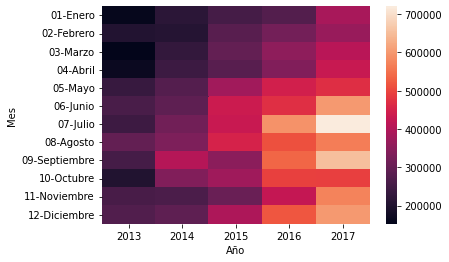

In [ ]:
sns.heatmap(df_4_pivot)

#Bonus: WordCloud

In [ ]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Hacemos la llamada a la API y guardamos la respuesta como un diccionario tipo json
response = requests.get('https://api.mercadolibre.com/trends/MLC/MLC1051').json()

In [ ]:
# Recorremos el diccionario tipo json y guardamos las keywords en una lista
keywords = []

for i in range(len(response)):
  keywords.append(response[i]['keyword'])

In [ ]:
keywords

['cargador iphone 12',
 'carcasa a21s',
 'carcasa iphone 12 pro max',
 'case iphone 12',
 'funda airpods pro',
 'carcasa a71 samsung',
 'reloj samsung',
 'cobre',
 'teléfono fijo',
 'mi band correa',
 'mi band',
 'cargador solar portatil',
 'iphone 13 carcasa',
 'correa apple 44mm',
 'iphone reacondicionado',
 'baston selfies',
 'xiaomi note 10',
 'xiaomi poco f3',
 'carcasa note 9 samsung',
 'porta celular bicicleta',
 'carcasa applle 13',
 'carcasa iphone se 2020',
 'kit de herramientas',
 'huawei p40',
 'iphone xs max',
 'apple watch se',
 'cable usb',
 'control para celular',
 'radios portatiles solar',
 'funda iphone 12 pro max',
 'celulares baratos',
 'celulares 5g',
 'iphone 13 pro max carcasa',
 'porta celular para auto',
 'xiaomi mi 11 5g',
 'carcasa xiaomi poco x3',
 'gatillos celular',
 'motorola one fusion',
 'batería externa celular',
 'carcasa iphone 7',
 'carcasa samsung z flip 3',
 'radios base vhf',
 'relojes inteligentes',
 'samsung a72',
 'woki toki',
 'samsung note 

In [ ]:
#Usando nltk, importamos las palabras conectoras o "stopwords" que usaremos para limpiar la nube de palabras
#De esta manera, la nube de palabras no tendrá stopwords, solo tendra las palabras clave de las busquedas
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Definimos la nube de palabras sobre la variable "keywords", usando como stopwords la variable "stop_words_sp"
wc = WordCloud(width=1200, height=1200, background_color = 'black' ,max_font_size = 500, max_words=40, stopwords = stop_words_sp, colormap = 'autumn_r').generate(' '.join(keywords))

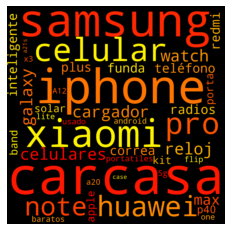

In [ ]:
#Imprimimos la nube de palabras
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()